In [124]:
#What is Machine Learning? - Why we use machine Learning?  - How to use machine Learning?
#Let us walk through an example of machine learning 
#This is a machine learning project predicting diabetes and involves using historical health data 
#to predict whether a person is likely to develop diabetes in the future 
#or if they already have it. The goal is to build a predictive model that can classify a person's 
#risk based on certain features (input variables) like age, gender, body mass index (BMI), 
#and other relevant health factors.

In [125]:
# Importing the necessary libraries
import numpy as np # linear algebr
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [126]:
#Explanation of the Code:
#1.Dataset: # read csv (comma separated value) into data, HCdiabetestable.csv
#2.Feature and Target
#3.Train-Test Split: The dataset is split into training and testing sets 
#(80% for training, 20% for testing).
#4.Model Training: A linear regression model is created and trained on the training data.
#5.Prediction: The model predicts the outcome of diabetes for the test data.
#6.Evaluation: The Mean Squared Error (MSE) is calculated to evaluate the performance of the model.
#7.Plotting: The data and the regression line are plotted to visualize how the model fits the data.

In [127]:
#1.Dataset: # read csv (comma separated value) into data, HCdiabetestable.csv
#read csv (comma separated value) into data
data = pd.read_csv('HCdiabetestable.csv')

In [128]:
#2.Feature and Target
# Feature and Target: X is the Age, and y is the outcome.
# Defining the feature (X) and target (y)
X = data[['BMI']]  # Feature: BMI
y = data['Age']  # Target: Age

In [48]:
# to see features and target variable
data.head()

,Pregnancies,Glucose,BloodPressure,Blood pressure Level,SkinThickness,Insulin,BMI,BMI Type,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,Normal Blood Pressure below 120,35,0,33.6,Obesity: BMI over 30,0.627,50,1
1,1,85,66,Normal Blood Pressure below 120,29,0,26.6,Overweight: BMI 25 to 29.9,0.351,31,0
2,8,183,64,Normal Blood Pressure below 120,0,0,23.3,Normal weight: BMI 18.5 to 24.9,0.672,32,1
3,1,89,66,Normal Blood Pressure below 120,23,94,28.1,Overweight: BMI 25 to 29.9,0.167,21,0
4,0,137,40,Normal Blood Pressure below 120,35,168,43.1,Obesity: BMI over 30,2.288,33,1


In [129]:
#The data.info() is used in Python with pandas to get a summary of a DataFrame. 
#When you call data.info(), it provides useful information about the DataFrame, such as:
#The number of entries (rows).
#The column names.
#The non-null count for each column.
#The data types of each column.
#Memory usage of the DataFrame.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Blood pressure Level      768 non-null    object 
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   BMI Type                  768 non-null    object 
 8   DiabetesPedigreeFunction  768 non-null    float64
 9   Age                       768 non-null    int64  
 10  Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 66.1+ KB


In [130]:

#01 - Pregnancies: Number of times pregnant.
#02 - Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
#03 - BloodPressure: Diastolic blood pressure (mm Hg).
#04 - Blood pressure Level 
#05 - SkinThickness: Triceps skinfold thickness (mm).
#06 - Insulin: 2-Hour serum insulin (mu U/ml).
#07 - BMI: Body mass index (weight in kg / height in m^2).
#08 - BMI Type 
#09 - DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
#10 - Age: Age in years.
#11 - Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.

#Utilize this dataset to explore the relationships between various health indicators and the likelihood of diabetes. 
#You can apply machine learning techniques to develop predictive models, feature selection strategies, 
#and data visualization to uncover insights that may contribute to more accurate risk assessments. 
#As you embark on your journey with this dataset, remember that your discoveries could have a profound impact 
#on diabetes prevention and management.

#Please ensure that you adhere to ethical guidelines and respect the privacy of individuals represented 
#in this dataset. Proper citation and recognition of this dataset's source are appreciated to promote 
#collaboration and knowledge sharing.
#Start your exploration of the Diabetes Prediction Dataset today and contribute to the ongoing efforts 
#to combat diabetes through data-driven insights and innovations

In [131]:
#data.duplicated().sum() is used to identify and count duplicate rows in a DataFrame. 
#data.duplicated(), returns a boolean Series 
#where each value is True if the corresponding row is a duplicate and False if it is unique.
#.sum(), counts how many True values are in the boolean Series, 
#essentially giving the total number of duplicate rows.

data.duplicated().sum()

0

In [132]:
# Check how many duplicate rows exist
duplicate_count = data.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

# Remove duplicates
data.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
duplicate_count_after = data.duplicated().sum()
print(f"Number of duplicates after removal: {duplicate_count_after}")

Number of duplicates: 0
Number of duplicates after removal: 0


In [4]:
#3.Train-Test Split: The dataset is split into training and testing sets.
# Splitting the dataset into training and testing sets (80% training, 20% testing)
#train_test_split(X, y, test_size=0.2, random_state=42)
#X: This represents the features (input variables) of the dataset.
#y: This represents the target labels or output variables associated with X.
#test_size=0.2: Specifies that 20% of the dataset will be used for testing, 
#and the remaining 80% will be used for training.
#random_state=42: Ensures reproducibility of the split. Setting a fixed random seed ensures that the split will be the same every time the code is run, making results consistent.
#The function returns four outputs:
#X_train: Features for the training set (80% of the data).
#X_test: Features for the testing set (20% of the data).
#y_train: Labels for the training set (corresponding to X_train).
#y_test: Labels for the testing set (corresponding to X_test).

#Used in machine learning workflows to create separate sets for training 
#and evaluating the performance of a model.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Example: generate some synthetic data
# (Replace this with your actual dataset)
X = np.random.rand(100, 1)  # Example feature matrix
y = 2 * X + 1 + np.random.randn(100, 1)  # Example target variable with some noise

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [5]:
#4.Model Training: A linear regression model is created and trained on the training data.
# Create and train the model (Linear Regression)
#This is using the LinearRegression class from sklearn.linear_model to fit a linear regression model 
#to the training data (X_train, y_train). 
#Create the model:
#model = LinearRegression() initializes a linear regression model.
#Fit the model:
#model.fit(X_train, y_train) trains the model using 
#the feature matrix X_train (input data) and 
#the target vector y_train (true values).
#After this, the model will be trained and you can use it to make predictions 
#on new data using the model.predict(X_test) method.
# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

#5. Make predictions on the test data
y_pred = model.predict(X_test)

# Print predictions
print("Predictions on test data:", y_pred)

Predictions on test data: [[1.9803939 ]
 [1.86722826]
 [2.0956607 ]
 [1.86509497]
 [1.46750986]
 [2.31471275]
 [2.18079369]
 [1.79683124]
 [1.37102103]
 [2.20321756]
 [1.79323841]
 [1.72129644]
 [1.48628804]
 [2.39898007]
 [2.3675188 ]
 [1.62243676]
 [1.61210285]
 [2.42697819]
 [1.8472084 ]
 [2.54409199]]


In [135]:
#6.Evaluation: The Mean Squared Error (MSE) is calculated to evaluate the performance of the model.
# Evaluate the model
#Mean Squared Error: This will give you a sense of how well your model performed (lower values indicate better performance).
#Plot: A plot showing the relationship between the BMI and Diabetes , with the regression line.

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 0.7734668543553337
R-squared: 0.435775528505582


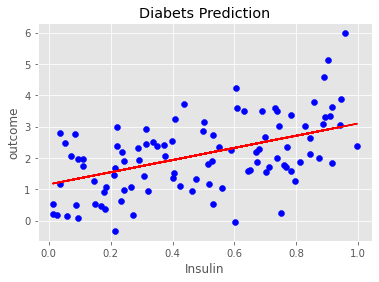

In [136]:
# 7.Plotting: The data and the regression line#  
# plt.style.use('ggplot')
#are plotted to visualize how the model fits the data.
#The outcome when 
#it is positive or presence of diabetes, it is = (1) or when 
#it is negative or absence of diabetes, it is = (0) 

plt.scatter(X, y, color='blue')  # Scatter plot of the data
plt.plot(X, model.predict(X), color='red')  # Regression line
plt.title("Diabets Prediction")
plt.xlabel("Insulin")
plt.ylabel("outcome")
plt.show()

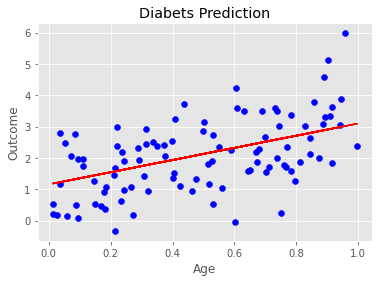

In [137]:
#7.Plotting: The data and the regression line are plotted to visualize how the model fits the data.
# Plotting the data and the regression line
#The outcome when 
#it is positive or presence of diabetes, it is = (1) or when 
#it is negative or absence of diabetes, it is = (0) 
plt.scatter(X, y, color='blue')  # Scatter plot of the data
plt.plot(X, model.predict(X), color='red')  # Regression line
plt.title("Diabets Prediction")
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.show()


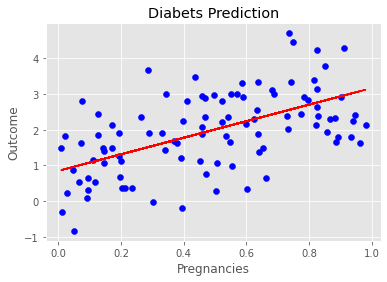

In [121]:
#7.Plotting: The data and the regression line are plotted to visualize how the model fits the data.
# Plotting the data and the regression line
#The outcome when 
#it is positive or presence of diabetes, it is = (1) or when 
#it is negative or absence of diabetes, it is = (0) 
plt.scatter(X, y, color='blue')  # Scatter plot of the data
plt.plot(X, model.predict(X), color='red')  # Regression line
plt.title("Diabets Prediction")
plt.xlabel("Pregnancies")
plt.ylabel("Outcome")
plt.show()

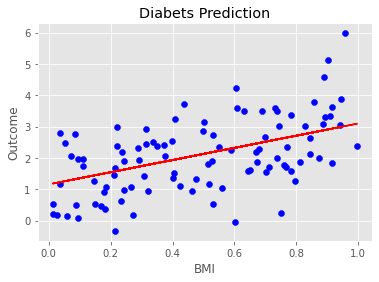

In [138]:
#7.Plotting: The data and the regression line are plotted to visualize how the model fits the data.
# Plotting the data and the regression line
#The outcome when 
#it is positive or presence of diabetes, it is = (1) or when 
#it is negative or absence of diabetes, it is = (0) 
plt.scatter(X, y, color='blue')  # Scatter plot of the data
plt.plot(X, model.predict(X), color='red')  # Regression line
plt.title("Diabets Prediction")
plt.xlabel("BMI")
plt.ylabel("Outcome")
plt.show()


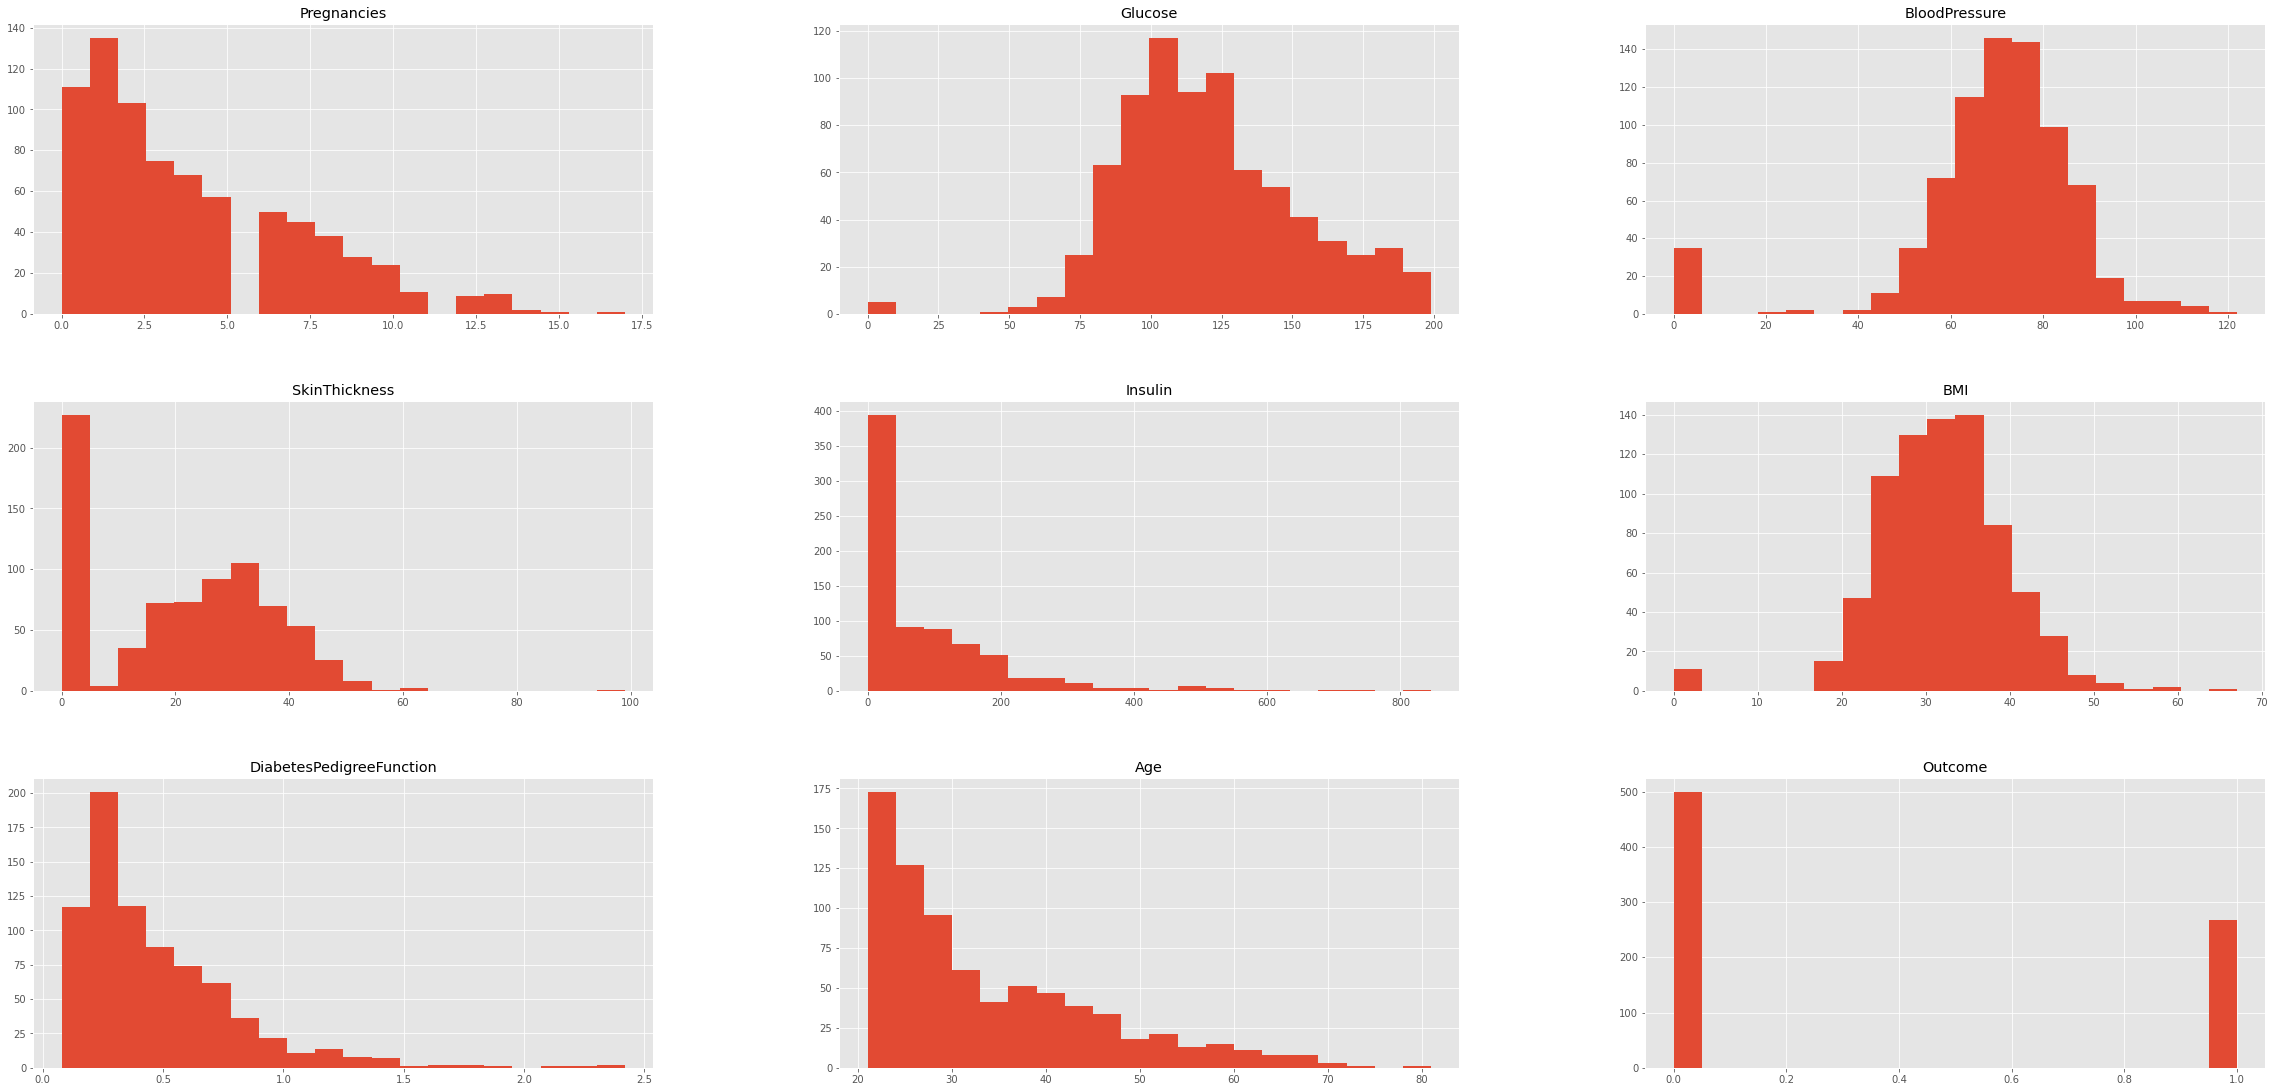

In [139]:
data.hist(bins=20, figsize=(40,40),layout=(6,3));

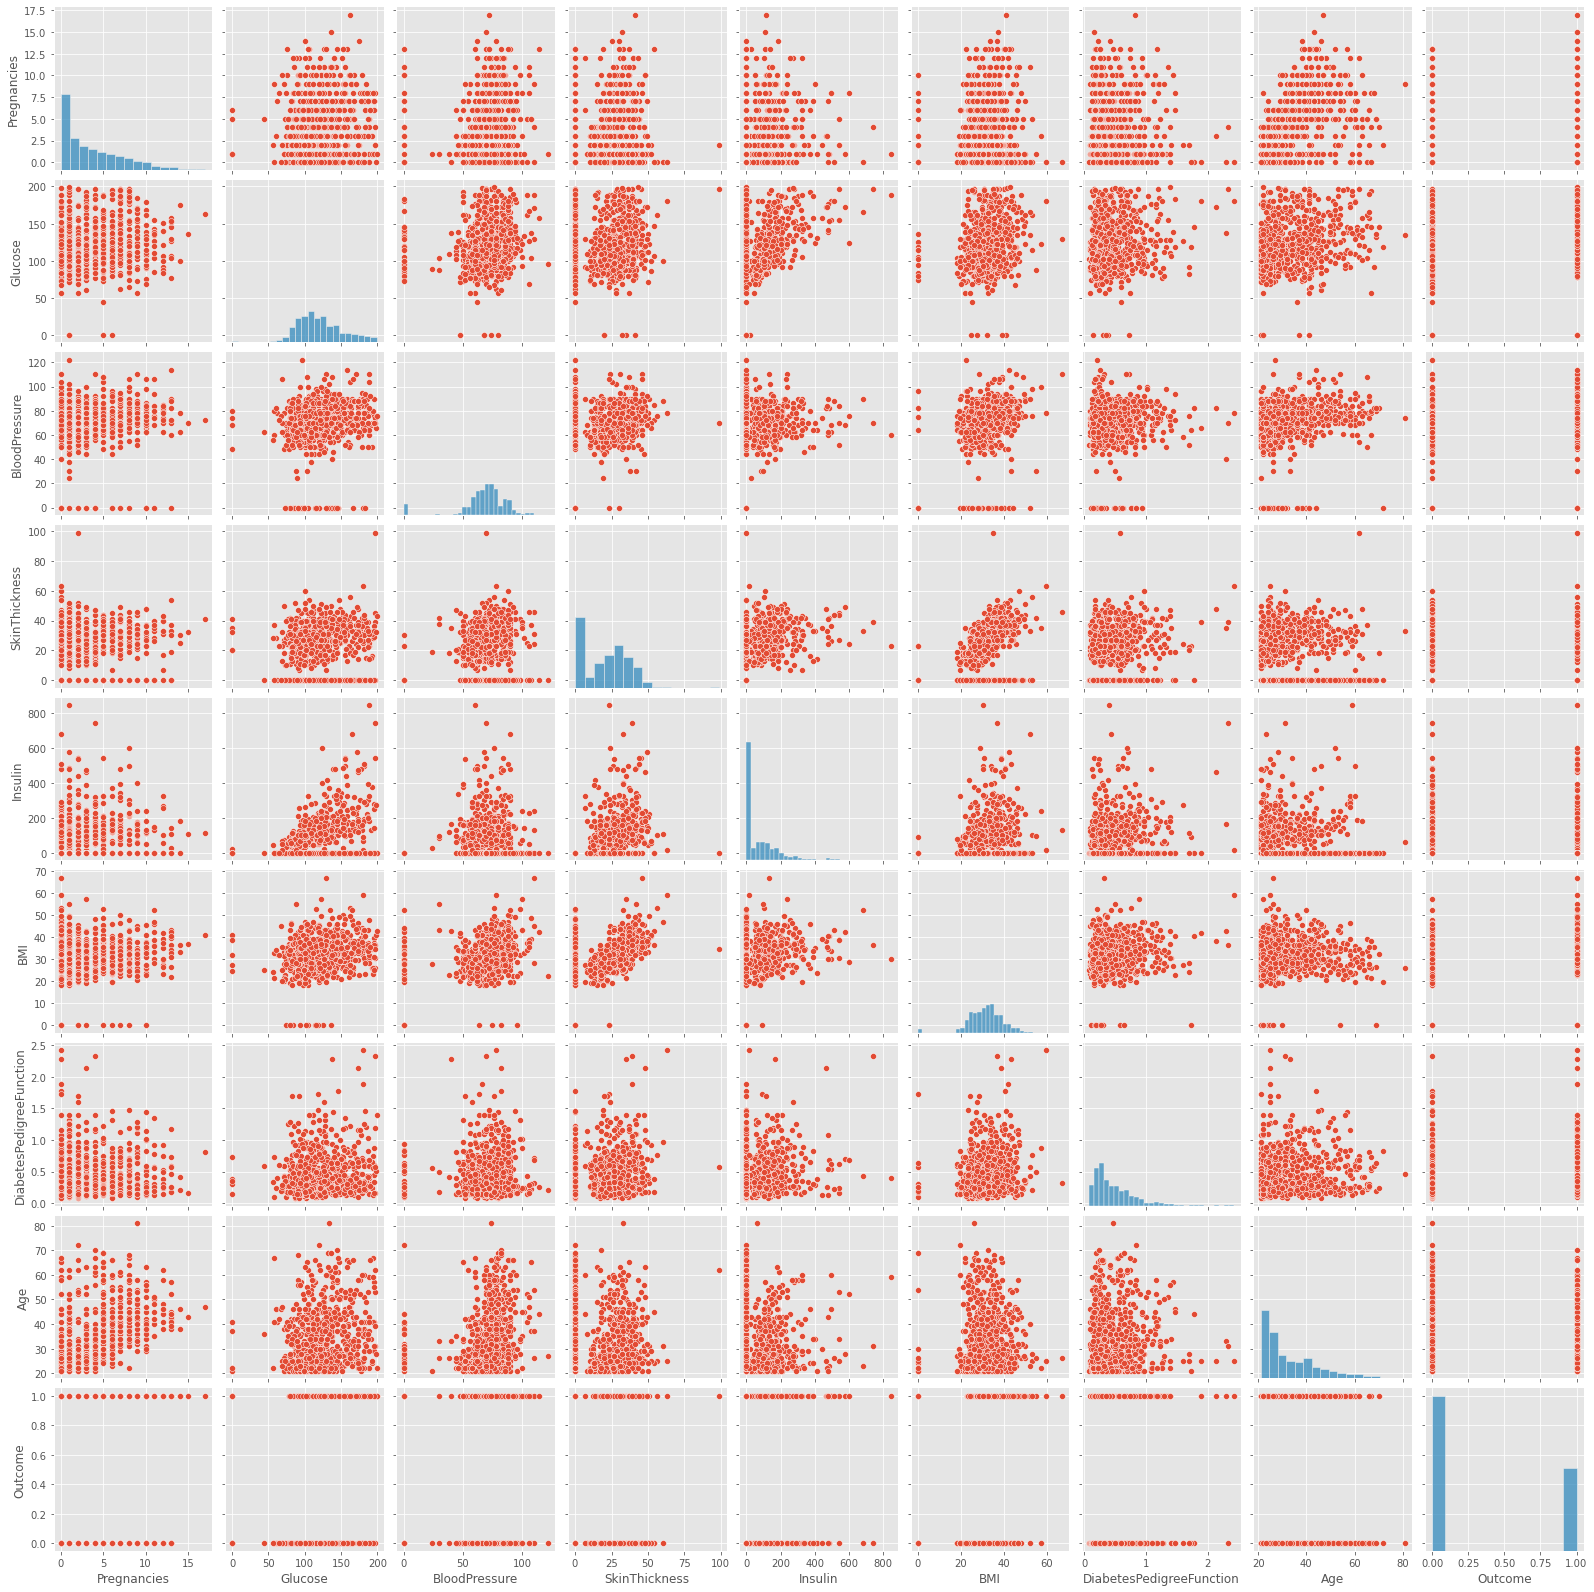

In [140]:
try:
    sns.pairplot(data)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.pair(data, kde_kws={'bw': 0.1})
    else:
        raise re

In [141]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


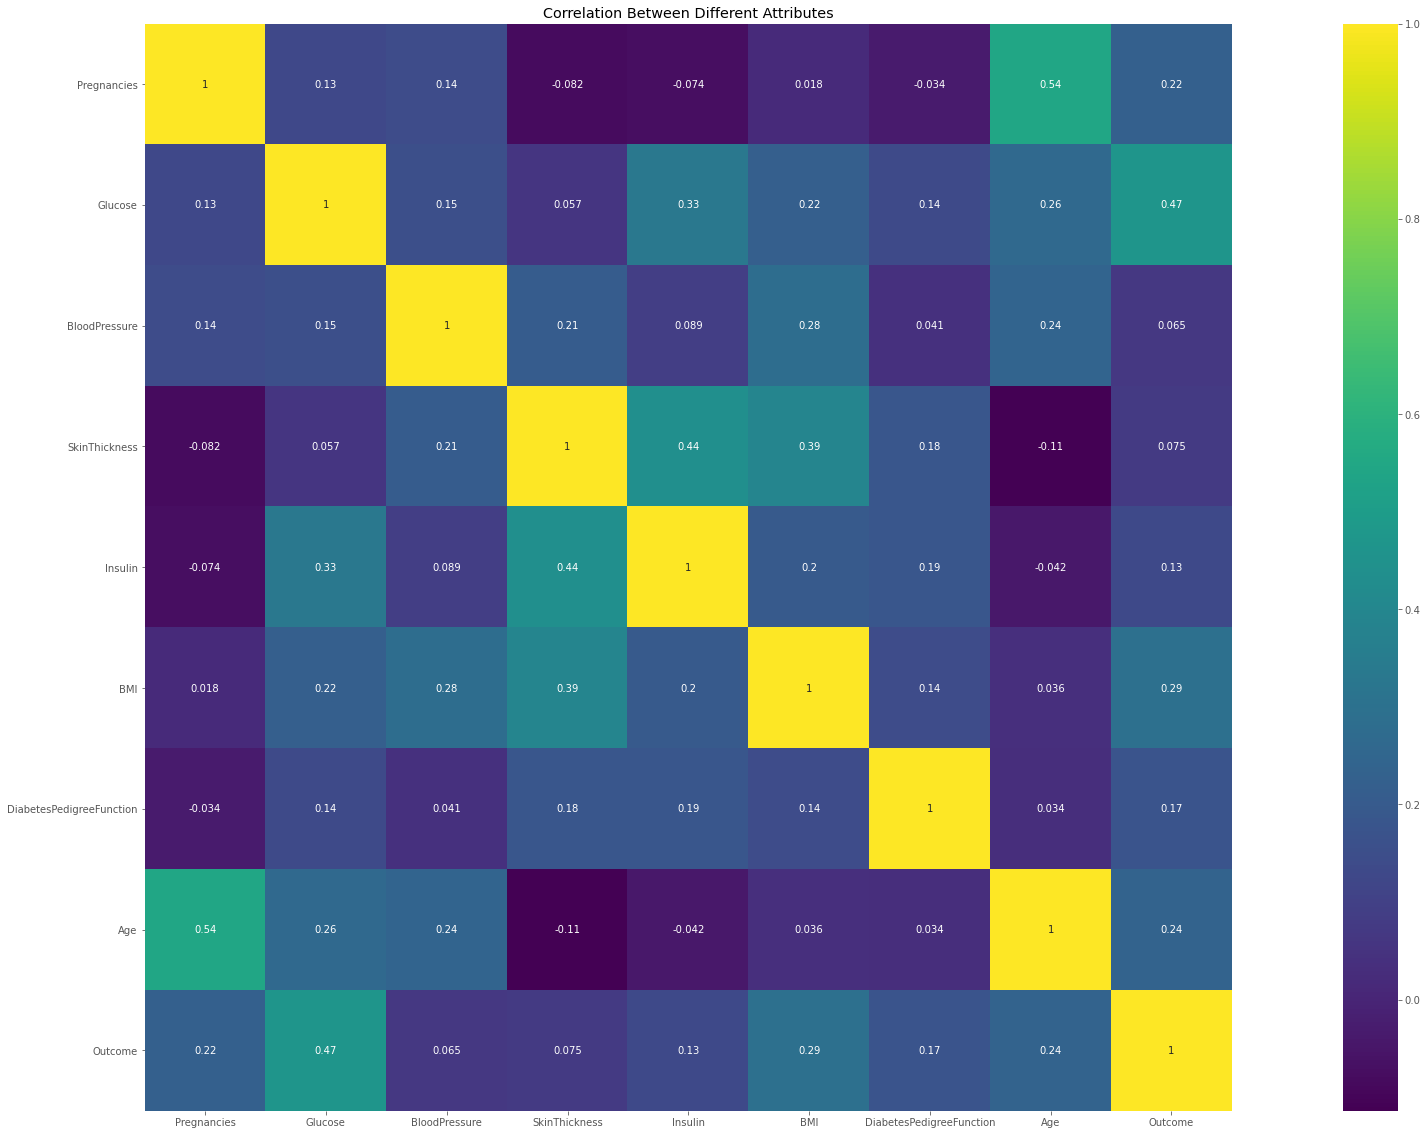

In [143]:
plt.figure(figsize=(40,20))

sns.heatmap(data.corr(), vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation Between Different Attributes')
plt.show()

<AxesSubplot:>

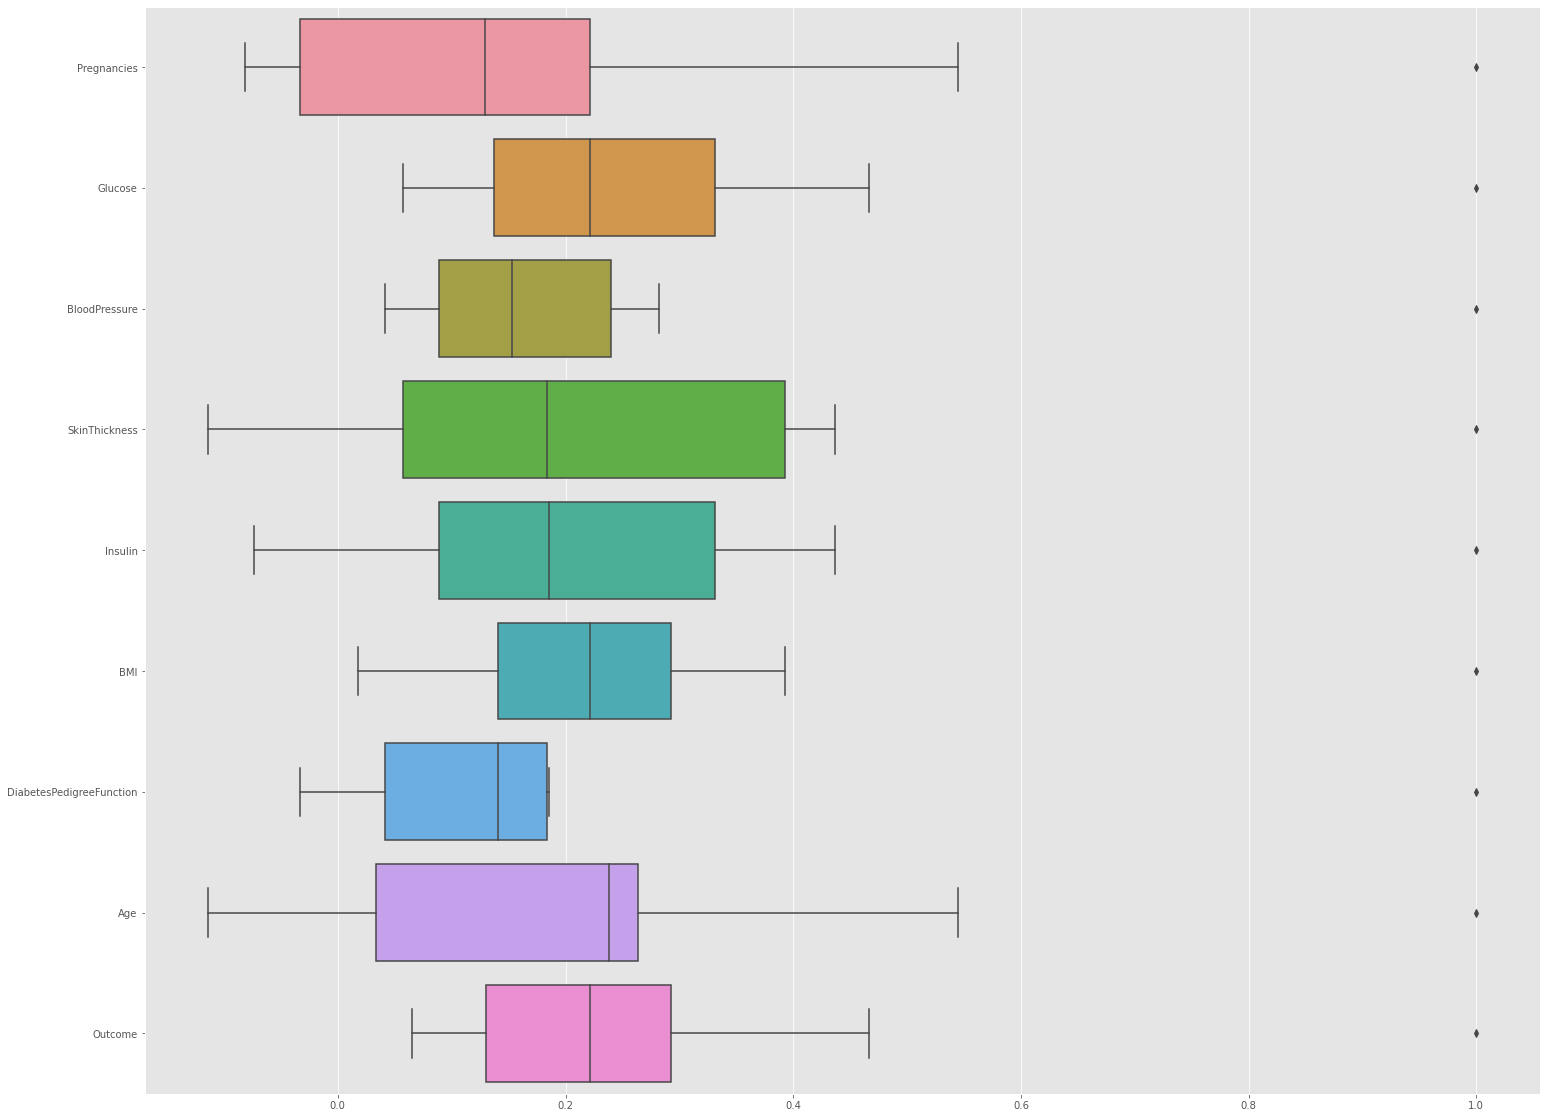

In [144]:
plt.figure(figsize=(25,20))
sns.boxplot(data = data.corr(), orient='h')

In [145]:
#Conclusion:
#Machine Learning allows us to make predictions and automate decision-making based on data. 
#By using algorithms such as Linear Regression, we can make sense of numerical data and predict future outcomes. 
#The example above illustrates how to implement a simple linear regression model in Python 
#to the outcome of diabetes.
#In real-world scenarios, datasets are often much larger and more complex, 
#and more advanced techniques such as decision trees, neural networks, or support vector machines may be used.
